In [36]:
# Import library depdendencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [37]:
# Import flapping_fin_data
data = pd.read_csv("data/flapping_fin_data.csv")

data.head()

,percentage_ac,flapfreq,Thrust_N
0,100,2.7500,15.461806
1,100,1.6250,0.878331
2,100,3.8750,25.876845
3,100,1.0625,0.257417
4,100,3.3125,22.518060


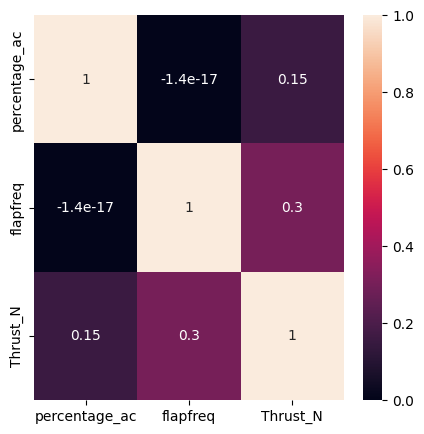

In [38]:
# Check correlation
corr_matrix = data.corr()

fig = plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True)

plt.show()

In [39]:
# Split input and output variable
y = data["Thrust_N"]
X = data.drop("Thrust_N",axis=1)

In [40]:
# Split train-test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Use regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

c:\Users\hafiz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


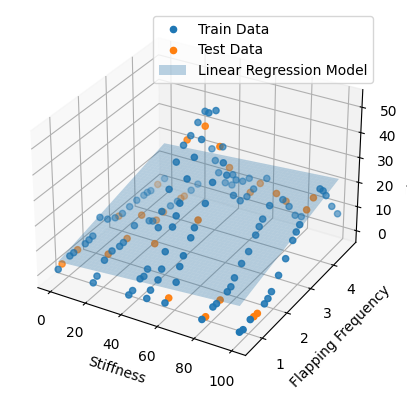

In [42]:
# Plot the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the training data with scater plot
X1_train = X_train['percentage_ac']
X2_train = X_train['flapfreq']
train_scatter = ax.scatter(X1_train, X2_train, y_train, label='Train Data')

# Plot the test data with scater plot
X1_test = X_test['percentage_ac']
X2_test = X_test['flapfreq']
test_scatter = ax.scatter(X1_test, X2_test, y_test, label='Test Data')

# # Plot the samples with scatter plot with orange color
# X1 = X['percentage_ac']
# X2 = X['flapfreq']
# samples_scatter = ax.scatter(X1, X2, y, label='Samples', color='orange')

# Create linear space, meshgrid, and vectos
X1_range = np.linspace(X['percentage_ac'].min(), X['percentage_ac'].max(), 100)
X2_range = np.linspace(X['flapfreq'].min(), X['flapfreq'].max(), 100)
X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)
X1_vec = X1_mesh.reshape(-1,)
X2_vec = X2_mesh.reshape(-1,)
X_vec = np.array([X1_vec, X2_vec]).T
y_vec_lr = lr.predict(X_vec)
y_mesh_lr = y_vec_lr.reshape(X1_mesh.shape)

# Plot the result with surface plot
surf = ax.plot_surface(X1_mesh, X2_mesh, y_mesh_lr, alpha=0.3, label='Linear Regression Model')
surf._facecolors2d=surf._facecolor3d
surf._edgecolors2d=surf._edgecolor3d

# Set the label
ax.set_xlabel('Stiffness')
ax.set_ylabel('Flapping Frequency')
ax.set_zlabel('Thrust (N)')

# Show legend
ax.legend()

ax.view_init()

plt.show()

In [43]:
# Scale the input data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Create new a knn model
knn2 = KNeighborsRegressor()

# Create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

# Use GridSearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)

# Fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [45]:
knn_gscv.best_params_["n_neighbors"]

1

In [51]:
# Use KNN model
knn = KNeighborsRegressor(n_neighbors=5)
# knn = KNeighborsRegressor(n_neighbors=knn_gscv.best_params_["n_neighbors"])

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)


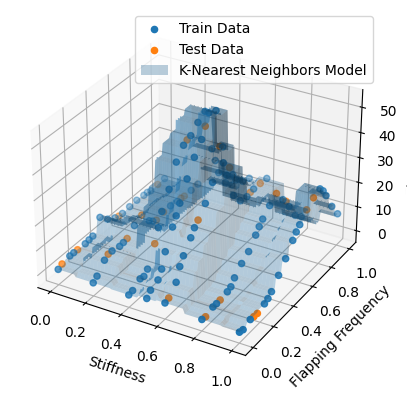

In [47]:
# Plot the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scaled training data with scater plot
X1_train_scaled = X_train_scaled[:,0]
X2_train_scaled = X_train_scaled[:,1]
train_scatter_scaled = ax.scatter(X1_train_scaled, X2_train_scaled, y_train, label='Train Data')

# Plot the scaled test data with scater plot
X1_test_scaled = X_test_scaled[:,0]
X2_test_scaled = X_test_scaled[:,1]
test_scatter_scaled = ax.scatter(X1_test_scaled, X2_test_scaled, y_test, label='Test Data')

# Create linear space, meshgrid, and vectos
X1_scaled_range = np.linspace(0, 1, 100)
X2_scaled_range = np.linspace(0, 1, 100)
X1_scaled_mesh, X2_scaled_mesh = np.meshgrid(X1_scaled_range, X2_scaled_range)
X1_scaled_vec = X1_scaled_mesh.reshape(-1,)
X2_scaled_vec = X2_scaled_mesh.reshape(-1,)
X_scaled_vec = np.array([X1_scaled_vec, X2_scaled_vec]).T
y_vec_knn = knn.predict(X_scaled_vec)
y_mesh_knn = y_vec_knn.reshape(X1_scaled_mesh.shape)

# Plot the result with surface plot
surf = ax.plot_surface(X1_scaled_mesh, X2_scaled_mesh, y_mesh_knn, alpha=0.3, label='K-Nearest Neighbors Model')
surf._facecolors2d=surf._facecolor3d
surf._edgecolors2d=surf._edgecolor3d

# Set the label
ax.set_xlabel('Stiffness')
ax.set_ylabel('Flapping Frequency')
ax.set_zlabel('Thrust (N)')

# Show legend
ax.legend()

ax.view_init()

plt.show()

In [52]:
# Test the score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_mae = mean_absolute_error(y_pred_lr, y_test)
lr_rmse = mean_squared_error(y_pred_lr, y_test, squared=False)
lr_r2 = r2_score(y_pred_lr, y_test)
knn_mae = mean_absolute_error(y_pred_knn, y_test)
knn_rmse = mean_squared_error(y_pred_knn, y_test, squared=False)

scores = pd.DataFrame({
    "Model": ("LR", "LR", "LR", "KNN", "KNN"), 
    "Score": ("MAE", "RMSE", "R2", "MAE", "RMSE"), 
    "Value": (lr_mae, lr_rmse, lr_r2, knn_mae, knn_rmse)
})

In [49]:
scores.set_index(["Model", "Score"], inplace=True)

In [53]:
scores

,Model,Score,Value
0,LR,MAE,9.487780
1,LR,RMSE,12.662692
2,LR,R2,-8.826056
3,KNN,MAE,1.888738
4,KNN,RMSE,2.836639
